In [4]:
from IPython.display import Image

<a name='toc'></a>  

##  Lab Three : Clustering

             
* <a href='#ref.01'> References</a> :
            
#toc

***

### Cluster Analysis   

 * #### Train     (1):  
     - Perform cluster analysis using several clustering methods (adjust parameters).  
 * #### Eval      (2):  
     - Use internal and/or external validation measures to describe and compare the clusterings and the clusters
     - How did you determine a suitable number of clusters for each method ?   
 * #### Visualize (3):
     - Use tables/visualization to discuss the found results.  
     - Explain each visualization in detail.  
 * #### Summarize (4):  
     - Describe your results.  
     - What findings are the most interesting and why ?  
     
***

<a name='me.01.t1'></a>

<font color = "#0B243B" size = 4>  Modeling and Evaluation 1

The base data set from which we are starting has appoximately 35 features. The data set was cleaned and pre-processed for analysis, as outlined in the prior sections of this report - missing values identified, outliers dispositioned, and also all features re-scaled to standard normal distribution.  

In the nominal data set some features are naturally scaled from 0 to 1 (real values), such as the Latent Dirichlet Allocation (LDA) measures, while other features are measured in the range of 0 - 800,000 ! (e.g. number of shares in social media context). Since both dimensionality reduction and cluster analyses depend on relative magnitudes, all features were mapped to standard normal distribution to provide even weighting of all features in the mapping / clustering processes. The binary features (e.g., is_data_channel_technology) are all retained as binary 0/1 valued features and one-hot encoded to similarly support evenly distributed distance evaluations among such categorical features.  

Early efforts in which we attempted to use the cleaned data set and perform cluster analyses yielded results which did not provide straightforward interpretations of the clustering results. Visually, the cluster maps did not provide well-organized presentations of clusters and the silhouette and distortion metrics were generally disorganzied as a function of the number of clusters - these metrics were not smooth functions that indicated in any clear sense an optimal or even preferred number of clusters from those analyses. Methods attempted at that point included k-means, DBSCAN, and Spectral Clustering.

* #### t-Distributed Stochastic Neighbor Embedding  

Thus, we were motivated to explore dimensionality reduction as a means to simplify the data set that we presented to the clustering algorithms. Evaluating choices for dimensionality reduction we considered Principal Components Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). Between the two methods, we decided to evaluate t-SNE.  
 - PCA linear dimensionality reduction algorithms is that they concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is important that similar datapoints must be represented close together, which is not what linear dimensionality reduction algorithms do. <sup><a href="#fn1" id="ref1">1</a></sup>  
 - t-SNE is a recently developed method (2008)<sup><a href="#fn2" id="ref2">2</a></sup> that provides a means of dimensional reduction and is becomg popular as a visualization tool for high dimensional data.  
     - The method is a probablistic method of mapping distance distributions from the high dimensional space to a lower dimensional space. In contrast to PCA, the t-SNE approach can provide differing results on successive solutions on the same data set.  
     - It is somewhat computationally expensive, and so the proceesing time can be prohibitive on large data sets. For our case, we chose to use 35% of the ~40,000 rows and 35 features. The processing time for a 2-dimensional mapping varied from 200 seconds (perplexity = 5) to 46 minutes (perplexity = 1000). This time duration was supportable and provides a good compromise of sampling 1/3 of the data set. The 35% sample from the full data set was selected as a random sample. The distributions of the features in the sampled set were similar to the distributions in the nominal full data set. This data set does not have features that are heavily biased, so random sampling within this data produces samples with similar dIStributions. 
     - multiple runs of the t-SNE algorithm with different samples produced t-SNE maps with visual similarities, and produced very consistent measures of KL-divergence from run to run. Thus, sampling within the set does not appreciably influence the produced mapped data.
     - the controlling parameter in the sci-kit learn implementation of t-SNE is the _perplexity_ parameter. _Perplexity_ in t-SNE is the parameter that functions to set the number of nearest neighbors in the mapped space. The authors of the method suggest that perplexity values in the range of 5 to 50 are typically used. For our evaluation, we experimented with _perplexity_ in the range of 5 to 1000. Kullback-Leibler divergence is the provided output measure in the sci-kit learn model and is recommended as a means to monitor the relative improvment of one t-SNE mapping in comparison with others as a function of the perplexity. The K-L divergence acts in this case as a measure of the cross-entropy between the provided feature set and the t-SNE mapped distribution. In our analysis, the K-L divergence continued to decrease with increasing perplexity without achieving a demonstrated minimum, although the curve of K-L divergence plotted vs. perplexity does exhibit an elbow with perplexity in the 200 - 400 range. In addition, the plot of processing time vs. perplexity shows an essentially linear relationship; thus increasing perplexity comes with a consequent cost to process time. Visually, the t-SNE mappings in 2-D space appear to generate visually separable clusters and approximately the same number of visual clusters. We estimate that using perplexity in the range of 75 - 400 for this data set provides reasonably consistent results for the purposes of this evaluation.  
     - in any case, once computed, the t-SNE maps for all values of perplexity were saved and are available for use in the subsequent clustering applications  
     - since the original data set was sampled at 35% of the full data set, the indices of the sampled rows were retained and written back to the saved data set of t-SNE vectors, so that the identical rows could be matched from the full data set during the later clustering analyses  
     
  

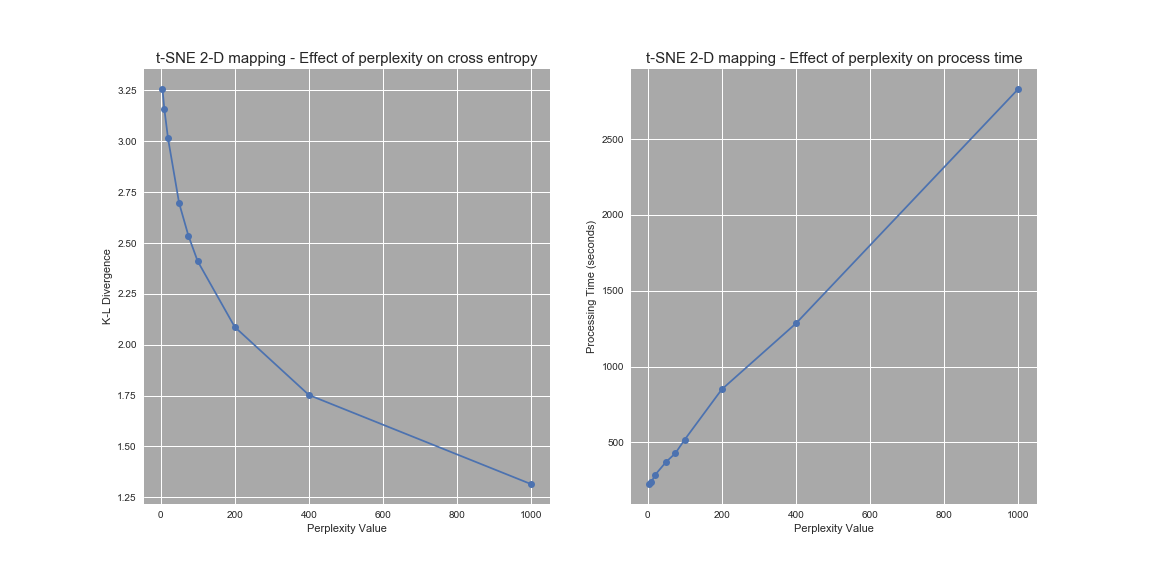

In [7]:
Image("../cluster/t_sne_divergence_process_time.png")

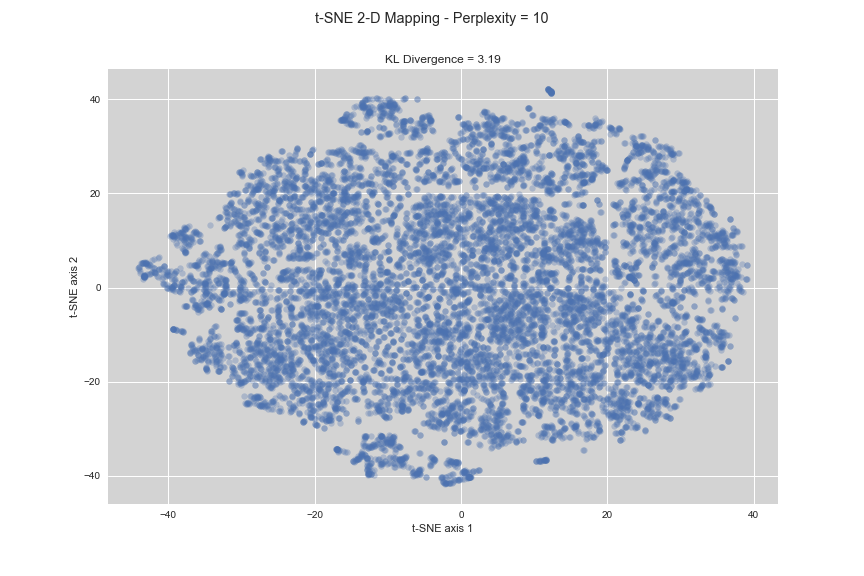

In [6]:
Image("../cluster/t-sne_perplx_plots/perplex_0010.png")

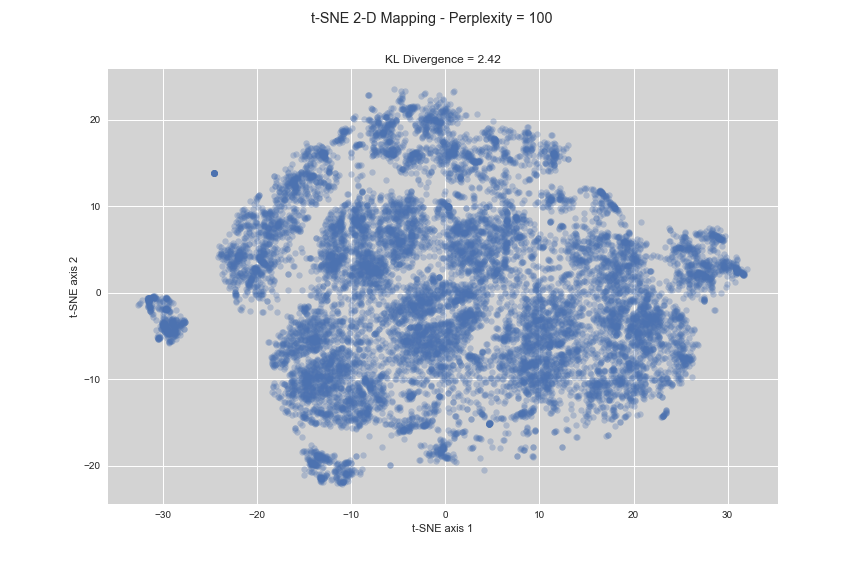

In [9]:
Image("../cluster/t-sne_perplx_plots/perplex_0100.png")

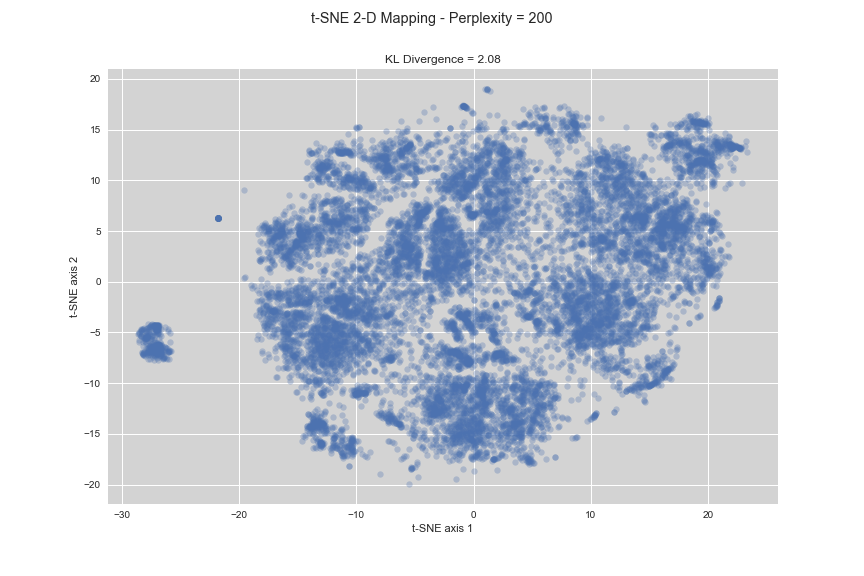

In [8]:
Image("../cluster/t-sne_perplx_plots/perplex_0200.png")

* ### Clustering  

Having completed the t-SNE mapping, the next step in the process was to apply different clustering methods for evaluation of appropriate clustering results.

In our evaluation, we chose to evaluate with  

* #### k-means clustering  
* #### spectral clustering  
* #### hierarchical clustering   
    
These three methods have fundamental differences and we assessed that they can provide different opportunities on this data set to provide opportunities to provide at least some success.  

* #### K-Means Clustering  
     
    - the process for implementing the k-means was as follows :  
        - read into memory the full data set  
        - read into memory the stored t-SNE vectors along with the reference indices 
        - conduct a join on the 2 data sets to match rows of the t-SNE vectors to their corresponding rows of the feature data  
        - initiate the k-means clustering from the sci-kit learn library  
            - the initialization method chosen is 'kmeans++' as that can improve convergence time  
    - the number of clusters was evaluated for 2 - 20 clusters
    - the results presented here correspond to the t-SNE 2-D vectors associated to perplexity value of 100
    - the results of the clustering were evaluated using the _silhouette_ and _inertia_ scores
    - the _silhouette_ score provides a measure of the cohesion of the observations within their assigned cluster relative to their separation from the observations in the neighboring clusters. The higher the silhouette value (to a maximum value of 1) represents a more preferred clustering.  For this evaluation, we plotted the average silhouette score for each _K_ value for the range of clusters. From the plot below, the silhouette score indicates that a clustering of 12 or 13 provides the highest silhouette score, and also a local maximum is observed at 7 clusters.  
    - the _inertia_ score provides the sum of squared distances of each value to its assigned cluster centroid. A lower _inertia_ score indicates lower variance within the set of clusters. As this is a continaully decreasing function relative to the number of clusters, typical practice is to identify an 'elbow' in the _inertia_ vs. number of clusters plot as an indicator of optimal number of clusters. That method is used here to identify that approximately 7 - 14 clusters can be considered the range of appropriate number of clusters.  
    
    
    - Thus, by standard measures, appropriate choices for number of clusters from this k-means clustering analysis is 12 or 13, and also it is reasonable to evaluate the clusters with k = 7.
            
            
       
         

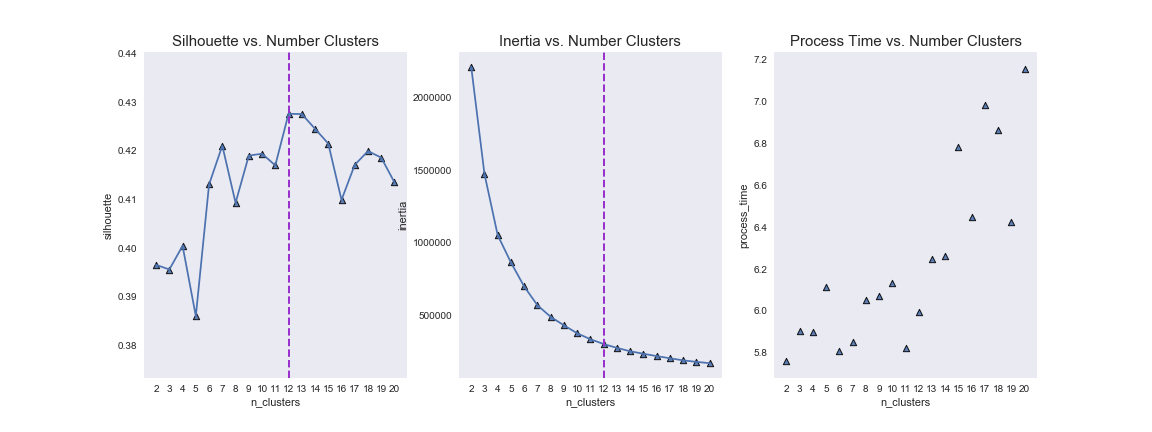

In [5]:
Image("../cluster/cluster_kmeans_number_of_clusters_eval.png")

* ### K-Means Clusters Evaluation  

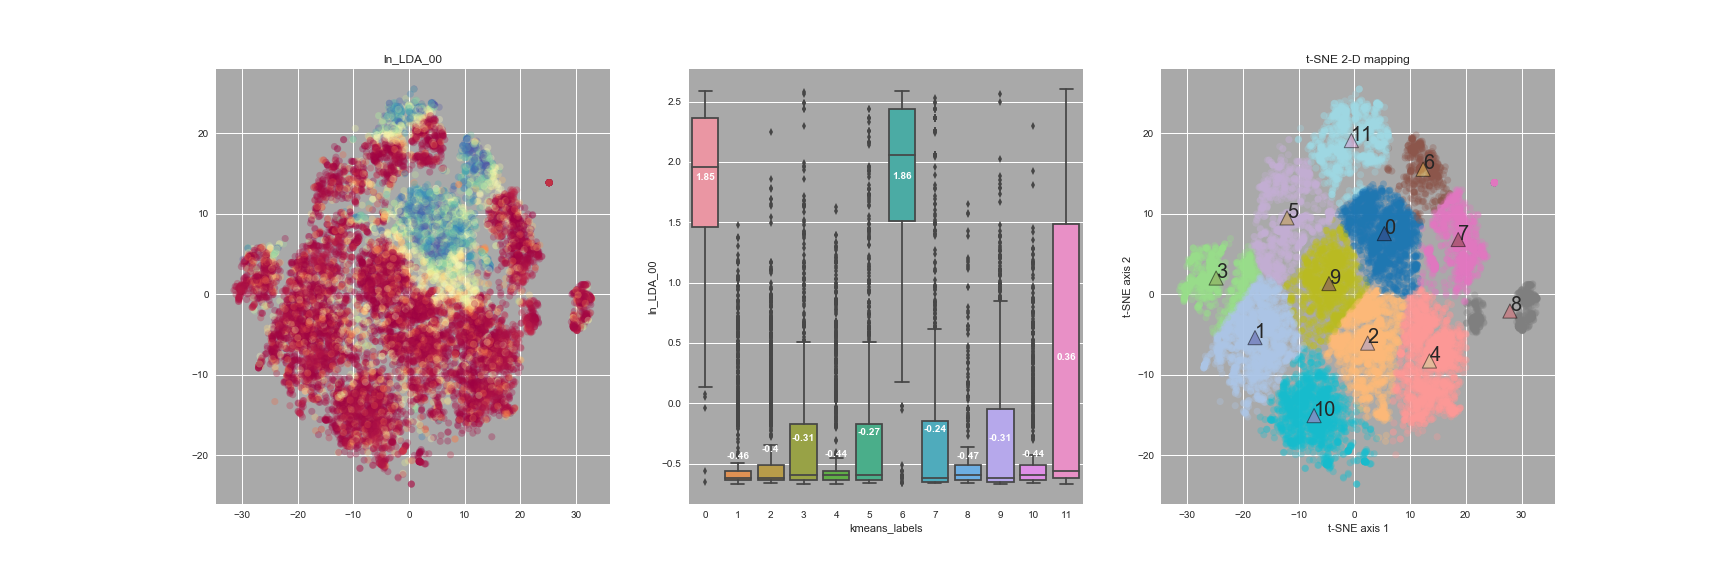

In [11]:
Image("../cluster/cluster_kmeans_downselect_3way_preplx_100_12_clstrsln_LDA_00.png")

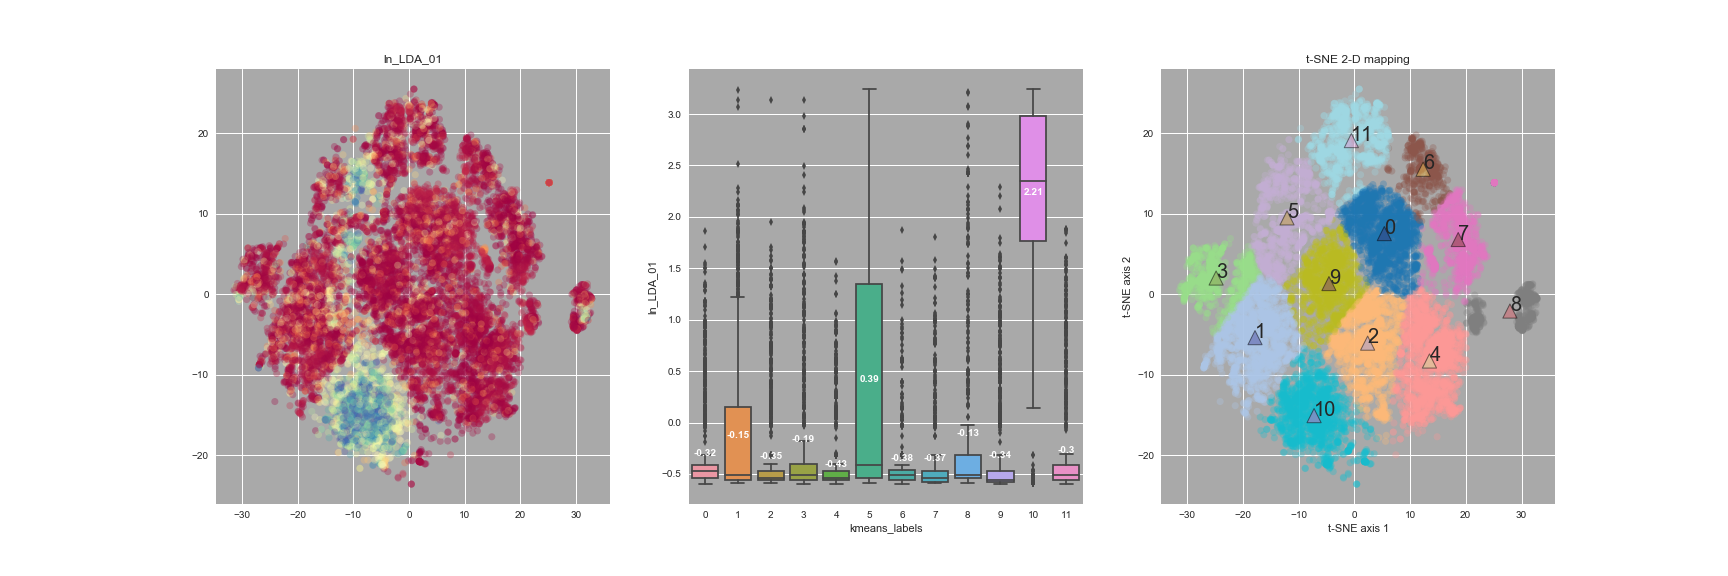

In [12]:
Image("../cluster/cluster_kmeans_downselect_3way_preplx_100_12_clstrsln_LDA_01.png")

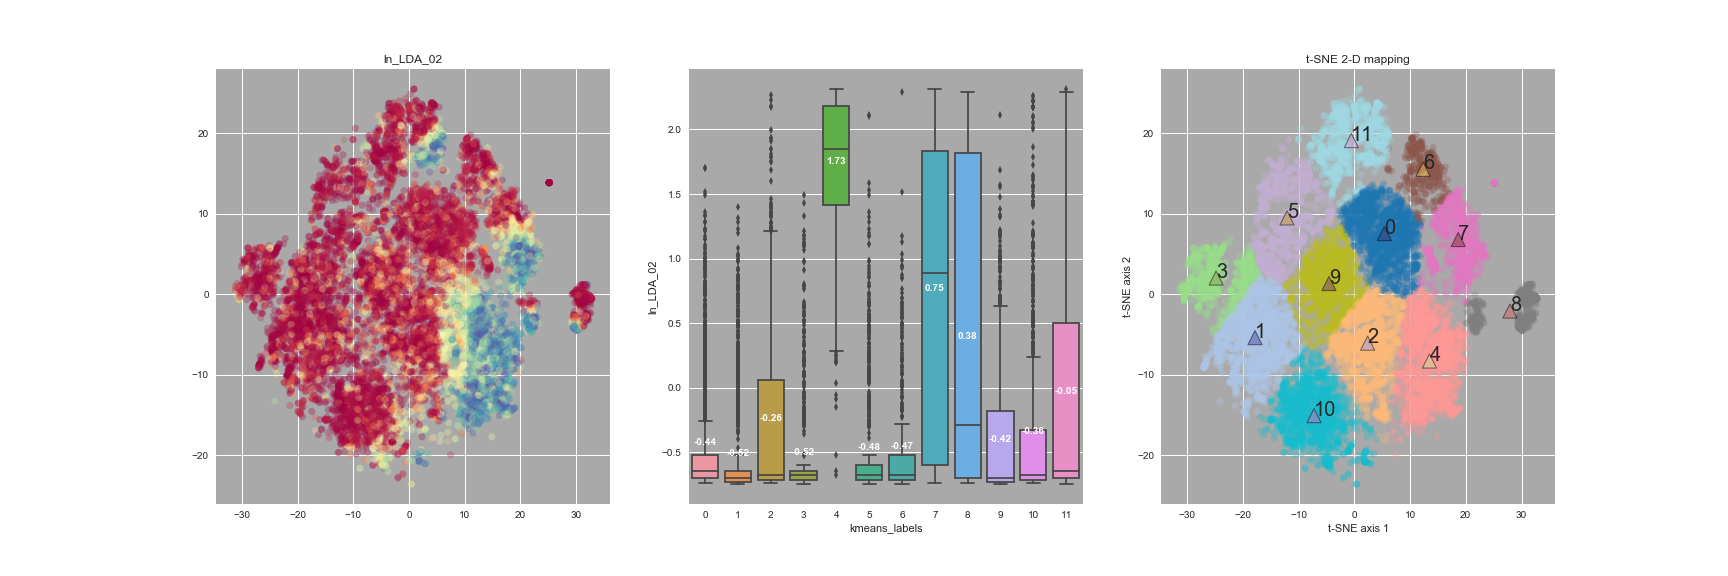

In [13]:
Image("../cluster/cluster_kmeans_downselect_3way_preplx_100_12_clstrsln_LDA_02.png")

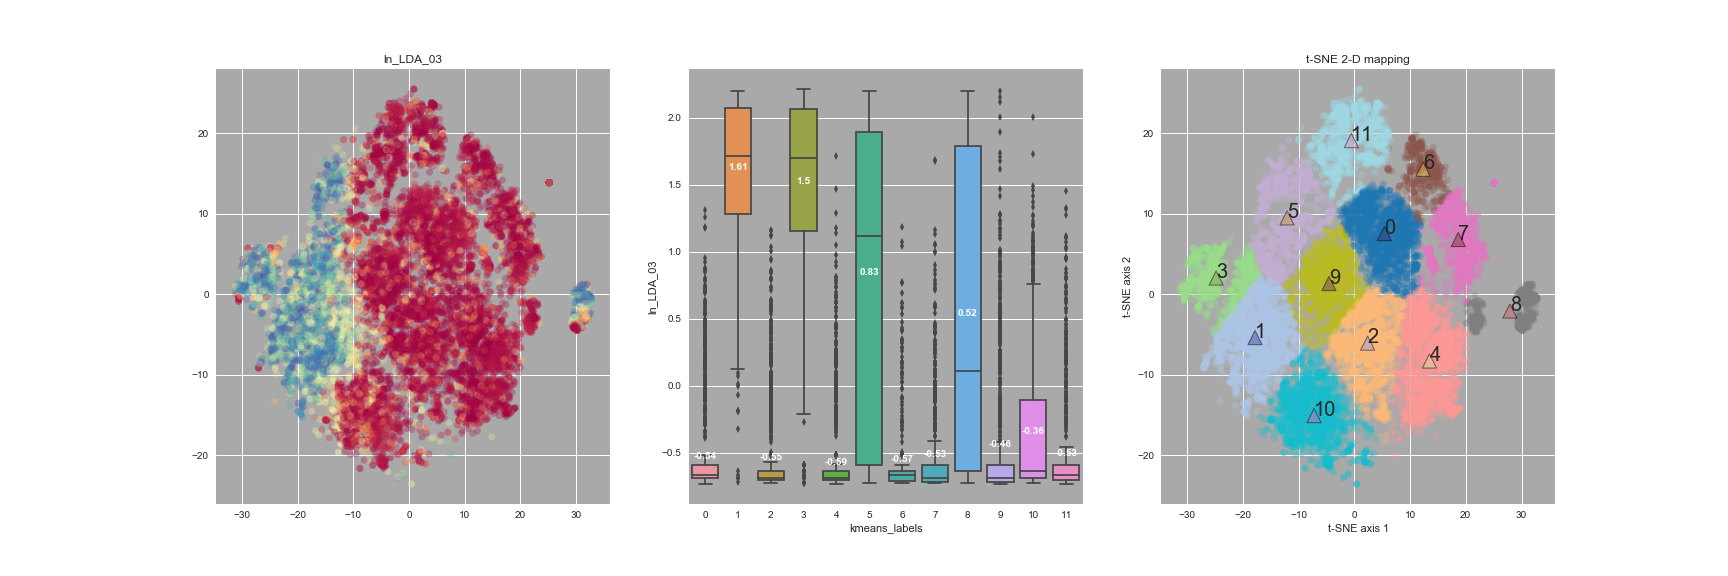

In [14]:
Image("../cluster/cluster_kmeans_downselect_3way_preplx_100_12_clstrsln_LDA_03.png")

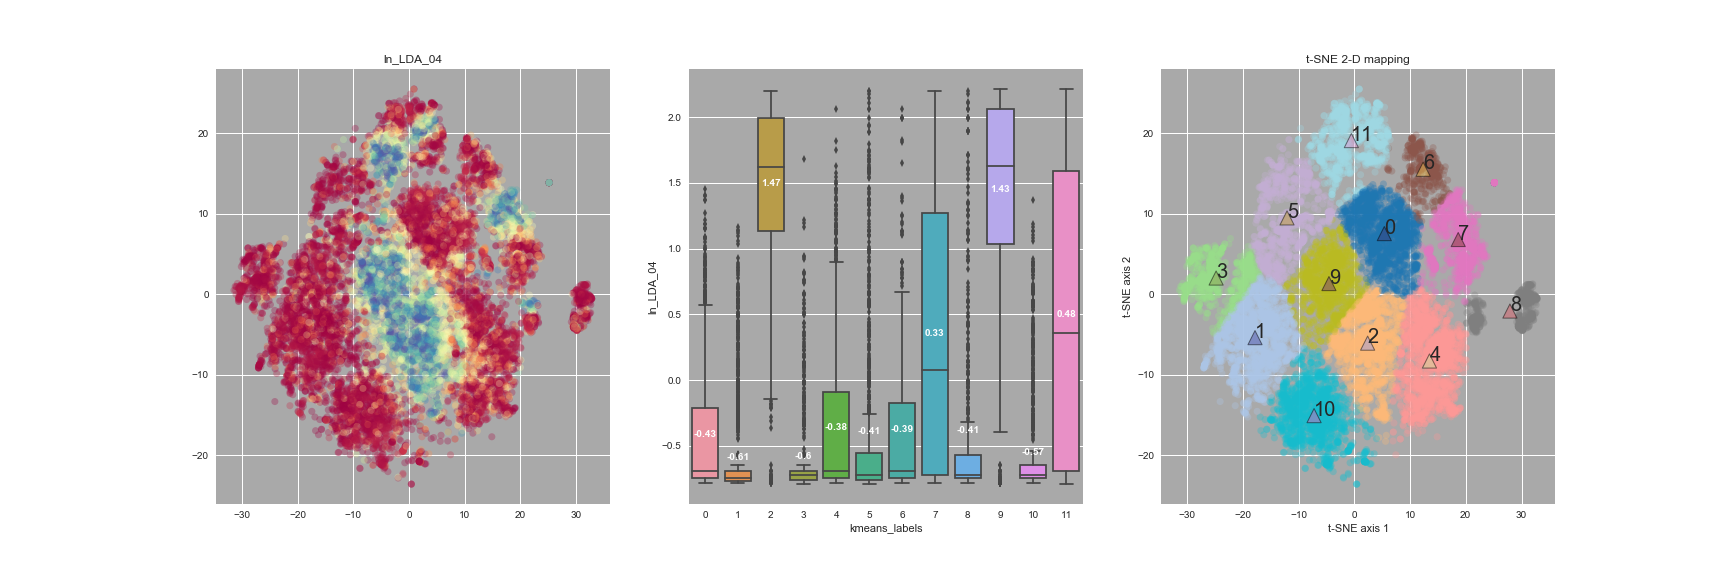

In [15]:
Image("../cluster/cluster_kmeans_downselect_3way_preplx_100_12_clstrsln_LDA_04.png")

<a name='ref.01'></a>  
<a href='#toc'>Return to Table of Contents</a>  

### References

1. <a name='fn1'></a> https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/  
2. <a name='fn2'></a> https://lvdmaaten.github.io/tsne/  